o artigo '_ARE EMILY AND GREG MORE EMPLOYABLETHAN LAKISHA AND JAMAL? A FIELD EXPERIMENT ON LABOR MARKET DISCRIMINATION_ ' busca investigar a discriminação racial no mercado de trabalho norte-americano. para isso, os pesquisadores enviam currículos fictícios para vagas de empregos reais, onde a única diferença entre os candidatos é que alguns possuem nomes comuns de pessoas norte-americanas brancas, como emily e greg, enquanto outros possuem nomes tipicamente afro-americanos, como Lakisha e jamal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import tabulate

In [2]:
df = pd.read_stata('Data\lakisha_aer.dta')
df

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,b,99,3,2,1,0,0,0,1,313,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Private
4866,a,99b,4,4,6,0,0,0,0,285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,
4867,a,99b,4,6,8,0,1,0,0,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,
4868,a,99b,4,4,2,0,1,1,0,267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,


O primeiro gráfico mostra os anos de experiência dos candidatos fictícios


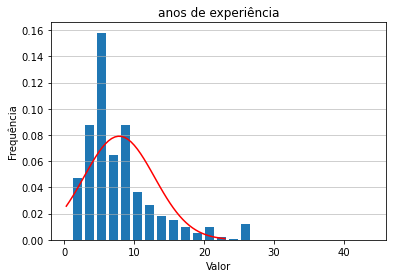

In [3]:

mu = df['yearsexp'].mean()
sigma = df['yearsexp'].std()
x = np.linspace(mu - 1.5*sigma, mu + 3 * sigma)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, label='Distribuição Normal', color = 'r')
plt.hist(df['yearsexp'],bins=25, rwidth = .8, density=True)
plt.title('anos de experiência')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)



plt.show()

Os gráficos a seguir mostram os anos de experiências dos candidatos fictícios para cada raça evidenciando que os candidatos seriam igualmente competentes

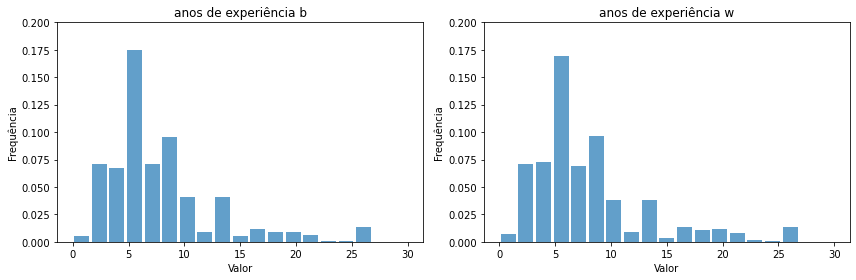

In [4]:

# Calcular a média por categoria usando groupby
experiencia_por_raca = df.groupby('race')['yearsexp'].mean()

# Plotar um histograma para cada categoria
fig, axes = plt.subplots(1,2, figsize=(12, 4))

for (categoria, dados), ax in zip(df.groupby('race'), axes):
    ax.hist(dados['yearsexp'], bins = np.linspace(0,30,20), alpha=0.7, rwidth=0.85, density = True)
    ax.set_title(f'anos de experiência {categoria}')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frequência') 
    ax.set_ylim(0, 0.2) 

plt.tight_layout()
plt.show()

a tabela abaixo mostra a quantidade de aplicações paracada gênero e raça, evidenciando que os nomes brancos tiveram mais callbacks que os nomes negros em ambos os gêneros

In [5]:
dados_tabulados = pd.crosstab([df['sex'], df['race']], df['call'], margins=True, margins_name="Total")
dados_tabulados['proporção'] = dados_tabulados[1]/dados_tabulados['Total']
dados_tabulados



call         0.0  1.0  Total  proporção
sex   race                             
f     b     1761  125   1886   0.066278
      w     1676  184   1860   0.098925
m     b      517   32    549   0.058288
      w      524   51    575   0.088696
Total       4478  392   4870   0.080493